In [1]:
#Import the libraries required.
import requests
import json
import pandas as pd
from datetime import datetime 
from fredapi import Fred
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report

In [2]:
#My registered API key.
fred = Fred(api_key = "ddbd89637a18a76eaad48ae6857bc838")

The chosen financial time series is 10-year treasury yields. It is a significant benchmark for indicating and predicting the performance of the financial market. It is closely monitored by all entities such as investors, economists and businesses. The time series also serves as a good indicator of the effects of central bank's monetary policy decisions.

The factors that might be relevant and affect this time series:

(With available data)
- Gross Domestic Product
- Unemployment Rate
- S&P 500
- Consumer Price Index
- Effective Federal Funds Rate
- Yield Curve Spread (Taking 2 years yield as short term investment and 10 years yield as long term)
- Market Volatility
- Money Supply (M2)
- Commodity Prices - Gold
- Commodity Prices - Oil
- Consumer Confidence Index 
- Public Debt of Government
- Economic Policy Uncertainty Index
- Exchange Rates (US-GB)
- Exchange Rates (US-EU)

(No available data)
- Global Economic Conditions
- Expected Interest Rates
- Government Policies
- Natural Disasters
- Geopolitical Events
- Technological Developments

### 10-year Treasury Yields 
**Unit: %**

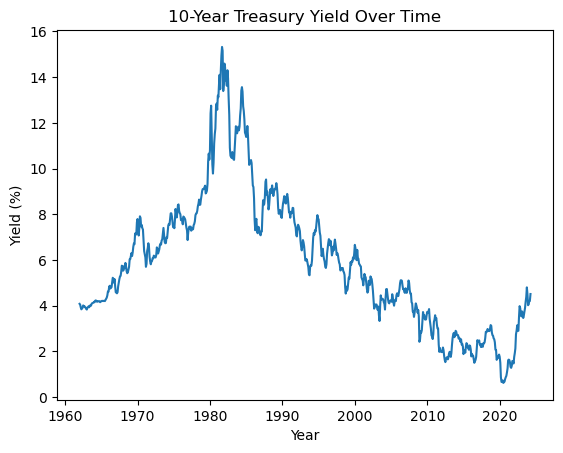

In [3]:
#Extract the monthly data of 10-year treasury yields. 
y10_treasury_yield = fred.get_series("DGS10", frequency = "m")

#Plot the data.
plt.plot(y10_treasury_yield)
plt.title("10-Year Treasury Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Yield (%)")
plt.show()

The plot of the 10-year treasury yield illustrates a steady increase of interest rates between 1960 and 1980. In 1980s, there was a sudden spike in interest rates, peaking at nearly 16%. The 1980s was a golden age of technological development, which likely stimulated growth in the bond and stock markets. Simultaneously, there was also a sudden spike in customer confidence index, as observed below. This might suggest a possible correlation between the investors sentiment and treasury yield, economic optimism might play a significant role here. 

Another trend was spotted was in 2020, as the 10-year treasury yield began to rise after more than 30 years of continuous decline. The world was severely impacted by COVID-19 in 2020, leading to government's fiscal policies aimed at rejuvenating the country's economy after recession. Polcies like tax relief and increased health care spending might have been crucial. 

### Factor 1: Gross Domestic Product (GDP) 
**Unit: $billion USD**

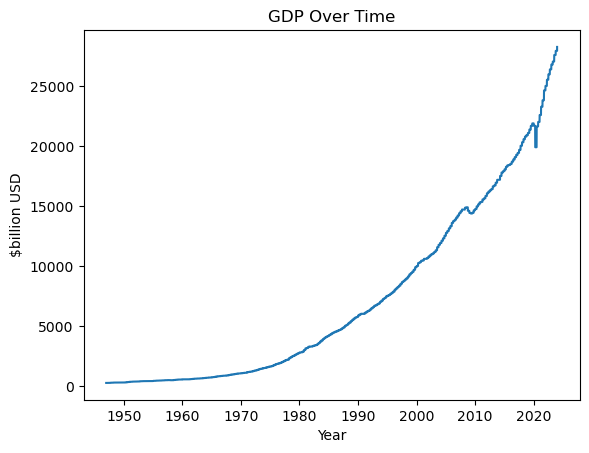

In [4]:
#Extract the quarterly data of GDP.
gdp_quarter = fred.get_series("GDP", frequency = "q")

#Resample the quarterly data to daily data.
#The NA entries will be filled with last observed non-empty value.
###Resample to daily instead of monthly because the data shows the values at the end of each month, not the beginning.
gdp_day = gdp_quarter.resample("D").ffill() 

#Plot the data.
plt.plot(gdp_day)
plt.title("GDP Over Time")
plt.xlabel("Year")
plt.ylabel("$billion USD")
plt.show()

### Factor 2: Unemployment Rate 
**Unit: %**

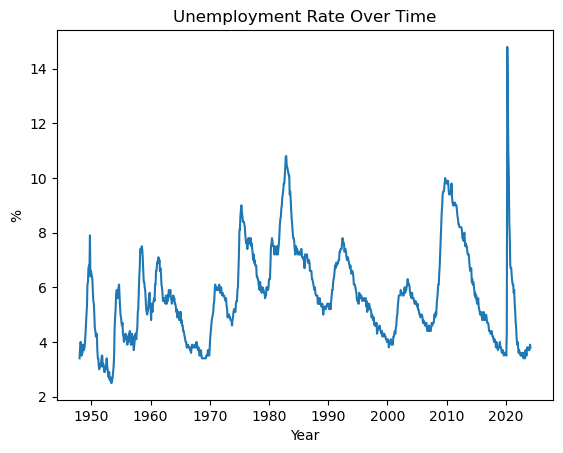

In [5]:
#Extract the monthly data of unemployment rate. 
unemployment_rate = fred.get_series("UNRATE", frequency = "m")

#Plot the data.
plt.plot(unemployment_rate)
plt.title("Unemployment Rate Over Time")
plt.xlabel("Year")
plt.ylabel("%")
plt.show()

### Factor 3: S&P 500 
**Unit: index value**

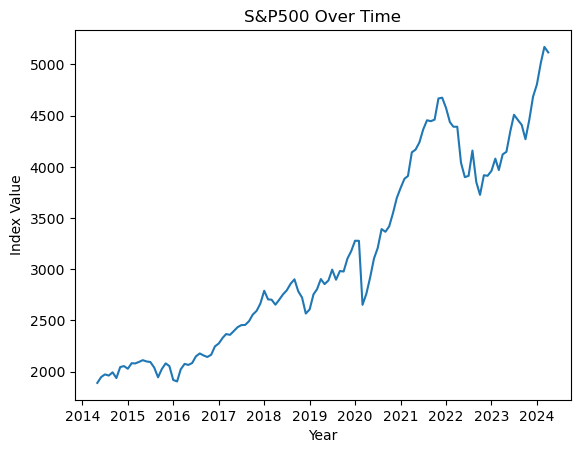

In [6]:
#Extract the monthly data of S&P 500.
sp500 = fred.get_series("SP500", frequency = "m") 

#Plot the data.
plt.plot(sp500)
plt.title("S&P500 Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()

### Factor 4: Consumer Price Index (CPI) 
**Unit: index value with a base of 100**

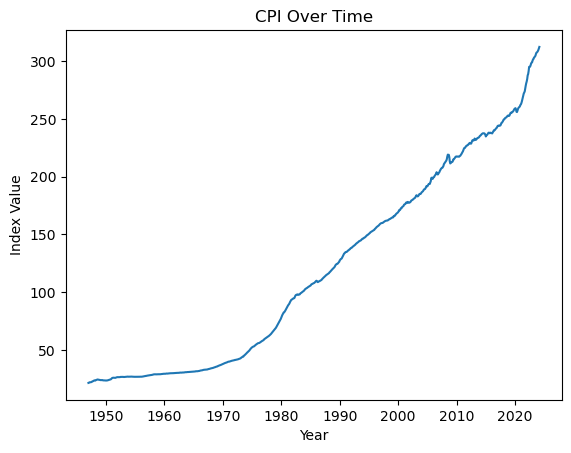

In [7]:
#Extract the monthly data of CPI.
cpi = fred.get_series("CPIAUCSL", frequency = "m")

#Plot the data.
plt.plot(cpi)
plt.title("CPI Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()

### Factor 5: Effective Federal Funds Rate 
**Unit: %**

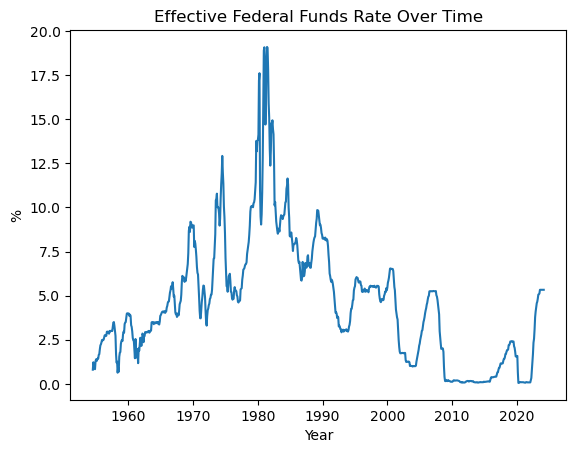

In [8]:
#Extract the monthly data of effective federal funds rate.
federal_funds_rate = fred.get_series("FEDFUNDS", frequency = "m")

#Plot the data.
plt.plot(federal_funds_rate)
plt.title("Effective Federal Funds Rate Over Time")
plt.xlabel("Year")
plt.ylabel("%")
plt.show()

### Factor 6: Yield Curve Spread (Yields between 2-Year Treasury and 10-Year Treasury) 
**Unit: %**

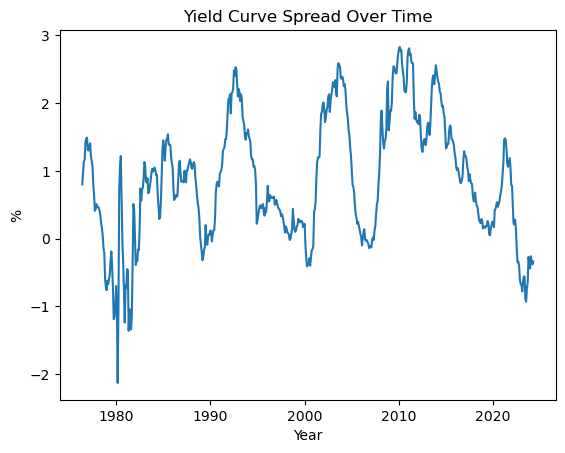

In [9]:
#Extract the monthly data of 2-year treasury yields.
#Find the yield curve spread.
y2_treasury_yield = fred.get_series("DGS2", frequency = "m")
diff_treasury_yield = y10_treasury_yield - y2_treasury_yield

#Plot the data.
plt.plot(diff_treasury_yield)
plt.title("Yield Curve Spread Over Time")
plt.xlabel("Year")
plt.ylabel("%")
plt.show()

### Factor 7: Market Volatility 
**Unit: index value**

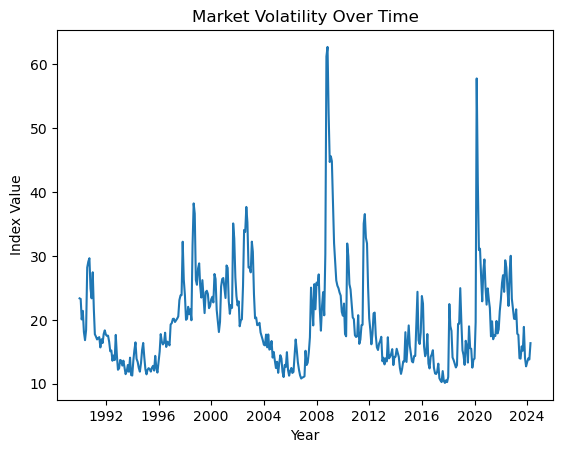

In [10]:
#Extract the monthly data of market volatility.
market_volatility = fred.get_series("VIXCLS", frequency = "m")

#Plot the data.
plt.plot(market_volatility)
plt.title("Market Volatility Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()

### Factor 8: Money Supply (M2) 
**Unit: $billion USD**

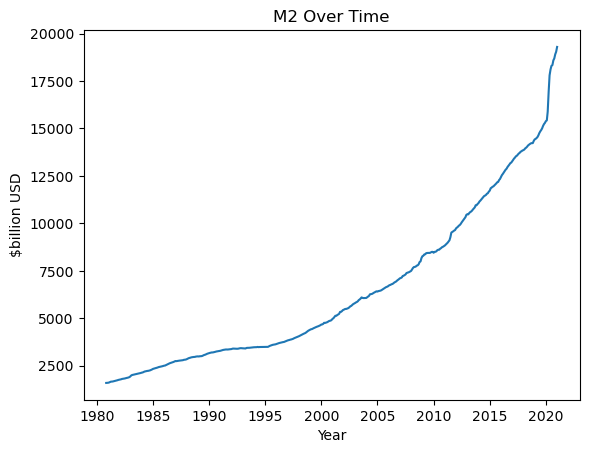

In [11]:
#Extract the monthly data of M2.
m2 = fred.get_series("M2", frequency = "m")

#Plot the data.
plt.plot(m2)
plt.title("M2 Over Time")
plt.xlabel("Year")
plt.ylabel("$billion USD")
plt.show()

### Factor 9: Commodity Prices - Gold
**Unit: $USD per ounce**

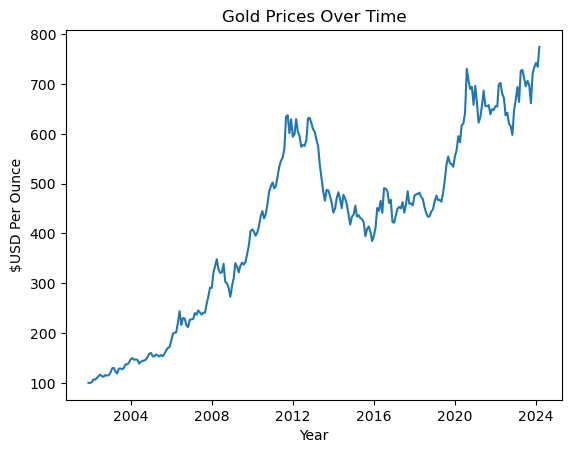

In [12]:
#Extract the monthly data of gold prices.
gold = fred.get_series("ID7108", frequency = "m")

#Plot the data.
plt.plot(gold)
plt.title("Gold Prices Over Time")
plt.xlabel("Year")
plt.ylabel("$USD Per Ounce")
plt.show()

### Factor 10: Commodity Prices - Oil (West Texas Intermediate) 
**Unit: $USD per barrel**

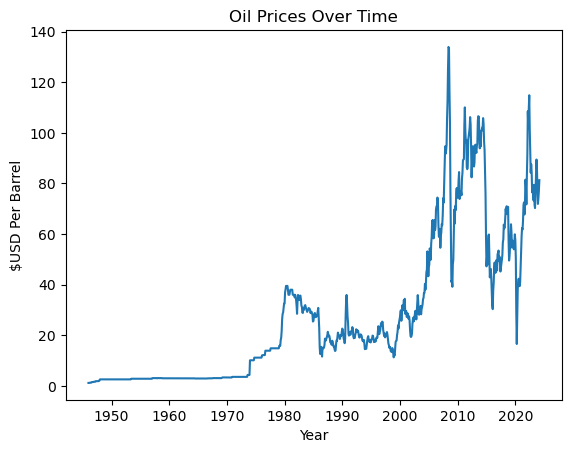

In [13]:
#Extract the monthly data of oil prices from West Texas Intermediate.
oil = fred.get_series("WTISPLC", frequency = "m")

#Plot the data.
plt.plot(oil)
plt.title("Oil Prices Over Time")
plt.xlabel("Year")
plt.ylabel("$USD Per Barrel")
plt.show()

### Factor 11: Consumer Confidence Index (CCI)
**Unit: index value**

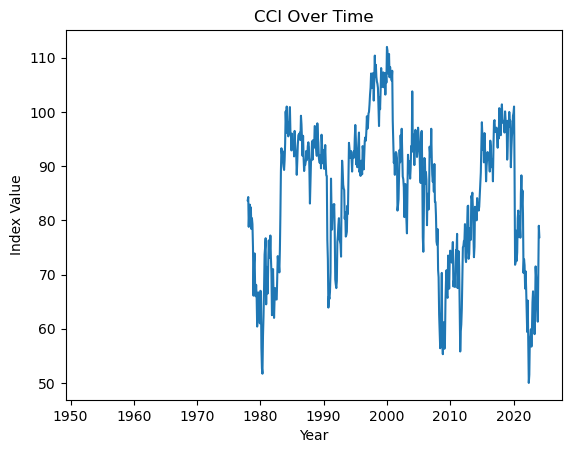

In [14]:
#Extract the monthly data of CCI.
cci = fred.get_series("UMCSENT", frequency = "m")

#Plot the data.
plt.plot(cci)
plt.title("CCI Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()

### Factor 12: Public Debt of Government 
**Unit: $billion usd**

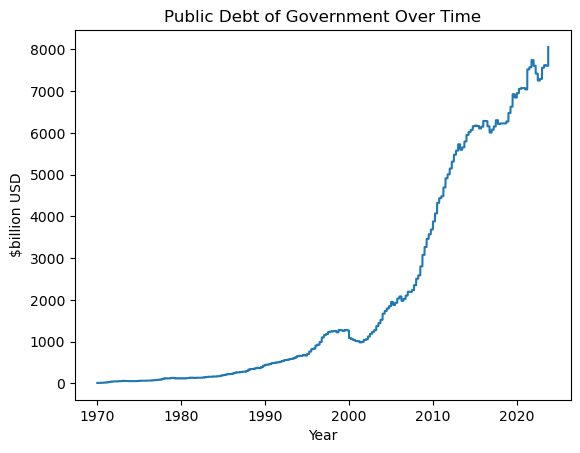

In [15]:
#Extract the monthly data of public debt of government.
government_debt_quarter = fred.get_series("FDHBFIN", frequency = "q")

#Resample the quarterly data to daily data.
#The NA entries will be filled with last observed non-empty value.
###Resample to daily instead of monthly because the data shows the values at the end of each month, not the beginning.
government_debt_day = government_debt_quarter.resample("D").ffill()

#Plot the data.
plt.plot(government_debt_day)
plt.title("Public Debt of Government Over Time")
plt.xlabel("Year")
plt.ylabel("$billion USD")
plt.show()

### Factor 13: Economic Policy Uncertainty Index
**Unit: index value**

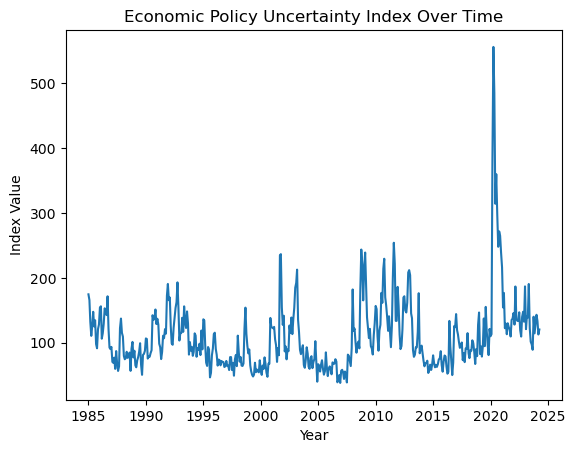

In [16]:
#Extract the monthly data of economic policy uncertainty index.
policy_uncertainty = fred.get_series("USEPUINDXD", frequency = "m")

#Plot the data.
plt.plot(policy_uncertainty)
plt.title("Economic Policy Uncertainty Index Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()

### Factor 14: Exchange Rates (US-GB)
**Unit: $USD to £**

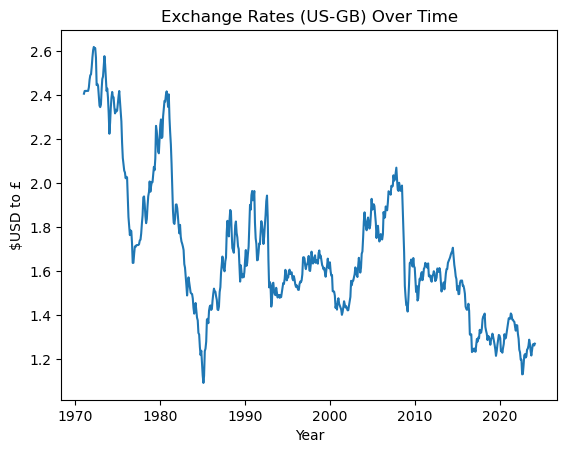

In [17]:
#Extract the monthly data of exchange rates (US-GB).
exchange_rate_usgb = fred.get_series("EXUSUK", frequency = "m")

#Plot the data.
plt.plot(exchange_rate_usgb)
plt.title("Exchange Rates (US-GB) Over Time")
plt.xlabel("Year")
plt.ylabel("$USD to £")
plt.show()

### Factor 15: Exchange Rates (US-EU)
**Unit: $usd to €**

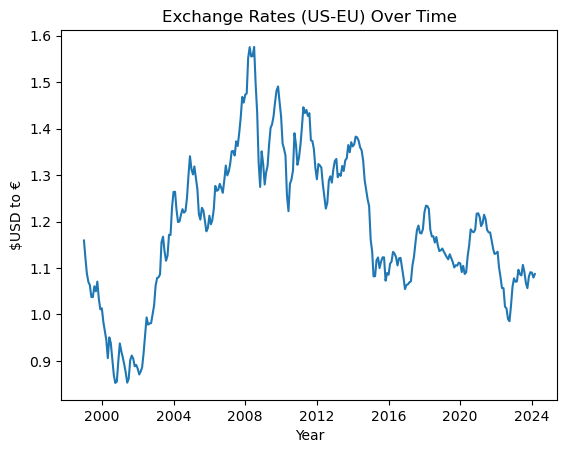

In [18]:
#Extract the monthly data of exchange rates (US-EU).
exchange_rate_useu = fred.get_series("EXUSEU", frequency = "m")

#Plot the data.
plt.plot(exchange_rate_useu)
plt.title("Exchange Rates (US-EU) Over Time")
plt.xlabel("Year")
plt.ylabel("$USD to €")
plt.show()

In [19]:
#General a dataframe with the chosen time series and all factors.
large_model = pd.DataFrame({
    "10-Year Treasury Yield": y10_treasury_yield,
    "GDP": gdp_day,
    "Unemployment Rate": unemployment_rate,
    "S&P 500": sp500,
    "Consumer Price Index (CPI)": cpi,
    "Effective Federal Funds Rate": federal_funds_rate,
    "Yield Curve Spread": diff_treasury_yield,
    "Market Volatility": market_volatility,
    "Money Supply (M2)": m2,
    "Gold Prices": gold,
    "Oil Prices": oil,
    "Consumer Confidence Index (CCI)": cci,
    "Public Debt of Government": government_debt_day,
    "Economic Policy Uncertainty Index": policy_uncertainty,
    "Exchange Rates (US-GB)": exchange_rate_usgb,
    "Exchange Rates (US-EU)": exchange_rate_useu
})

#Remove the row with NA entries
large_model = large_model.dropna()

In [20]:
#Check over each row for the difference between 2 consecutive rows.
yield_difference = large_model["10-Year Treasury Yield"].diff()

#create another variable, storing binary outcomes.
#1 represents increase in the 10-year treasury yield compared to last month and 0 otherwise.
yield_difference_binary = []
for diff in yield_difference:
    if diff > 0:
        yield_difference_binary.append(1)
    else:
        yield_difference_binary.append(0)
        
large_model["Yield Change Binary"] = yield_difference_binary

#Standardise the factors within the large model.
scaler = StandardScaler()
standardised_columns = large_model.columns.difference(["10-Year Treasury Yield", "Yield Change Binary"])
large_model[standardised_columns] = scaler.fit_transform(large_model[standardised_columns])

#Define our training dataset x and testing dataset y.
#Apply the cross validation method, splitting into 10 consecutive folds.
trained_x = large_model[standardised_columns]
test_y = large_model["Yield Change Binary"]
cross_validation_sample = TimeSeriesSplit(n_splits = 10)

#The samples undergo the in-built machine learning Logistic Regression Cross Validation.
#The technique of elastic net in this function automatically removes the factors that are underfitted or overfitted.
#The large model will be simplified after the execution.
lr_sample = LogisticRegressionCV(cv = cross_validation_sample, 
                                 penalty = "elasticnet",
                                 l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                 max_iter = 10000,
                                 scoring = "roc_auc",
                                 solver = "saga")
lr_sample.fit(trained_x, test_y)

LogisticRegressionCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
                     l1_ratios=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=10000,
                     penalty='elasticnet', scoring='roc_auc', solver='saga')

In [21]:
lr_sample.coef_[0]

array([-0.23132683, -0.56116114, -2.15861764, -1.23838876, -0.50276317,
       -0.72264088, -0.57789636,  0.79506971,  0.1854411 ,  0.1379444 ,
        0.66331904, -1.12281056,  2.83080478,  1.09253839, -0.29841281])

These are the coefficients for each factors in order. Coefficients with small absolute values will be romoved.

In [22]:
#Use x as training data to train y.
#Predict the probability of train y with binary outcome of 1.
trained_y = lr_sample.predict(trained_x)
train_y_increase = lr_sample.predict_proba(trained_x)[:, 1]

### Confusion Matrix

In [23]:
confusion_matrix = confusion_matrix(test_y, trained_y)
confusion_matrix

array([[35, 10],
       [15, 21]], dtype=int64)

The confusion matrix has true negative, false positive, false negative, true positive of 35, 10, 15 and 21, respectively. Since our model contains 81 months of data, the true negative and true positive are the number of months that our trained y has predicted the binary outcome (1 = 10-year treasury yield will increase next month, 0 = otherwise) correctly using the simplified model, while 10 is the type I error and 15 is the type II error. 

56 out of 81 months are predicted correctly after verification with test y. Therefore, the accuracy is 69.14%. 

### AUC-ROC

In [24]:
auc_roc = roc_auc_score(test_y, train_y_increase)
auc_roc

0.7851851851851852

The AUC-ROC socre is a method to evaluate the performance of our binary classifaction model. With the score of 0.785, it indicates that our model is fairly accurate as this is a high score.

To conclude, our simplified model is a good model to forecast whether the 10-year treasury yield will increase next month or not. 